<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 4</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px"> Les réseaux de neurones profonds</span> </h1>

<h3><span style="color: #1F77B4; font-size: 50px"> Régularisation</span> </h3>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy                         as np
import tensorflow                    as tf
from tensorflow                      import keras
from tensorflow.keras.layers         import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers   import l2
from tensorflow.keras.models         import Sequential
from tensorflow.keras.optimizers     import Adam
import matplotlib.pyplot             as plt
from IPython.display                 import display, HTML
from sklearn.datasets                import make_moons
from sklearn.model_selection         import train_test_split
from sklearn.preprocessing           import StandardScaler
import time
import os

<hr style='border-top:4px solid #1F77B4;'>

In [2]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf")
    fig.savefig(f"{path}.png", format="png")
    fig.savefig(f"{path}.jpg", format="jpg")

<hr style='border-top:4px solid #1F77B4;'>

In [3]:
input_dim = 20

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.13 : Régularisation L1</h3>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

model = Sequential()
model.add(Dense(64, activation='relu',
                input_shape=(input_dim,),
                kernel_regularizer=l1(0.01)))

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.14 : Régularisation ElasticNet</h3>

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2

model = Sequential()
model.add(Dense(64, activation='relu',
                input_shape=(input_dim,),
                kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.15 : Régularisation MaxNorm</h3>

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm

model = Sequential()
model.add(Dense(64, activation='relu',
                input_shape=(input_dim,),
                kernel_constraint=MaxNorm(max_value=3)))

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.16 : Régularisation Dropout</h3>

In [7]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.5))

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.17 : Génération et prétraitement des données</h3>

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Génération de données synthétiques (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Partition des données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

<h3><span style="font-size: 30px">🎴</span> Figure 4.18 : Dispersion des individus du jeu de données "moons" </h3>

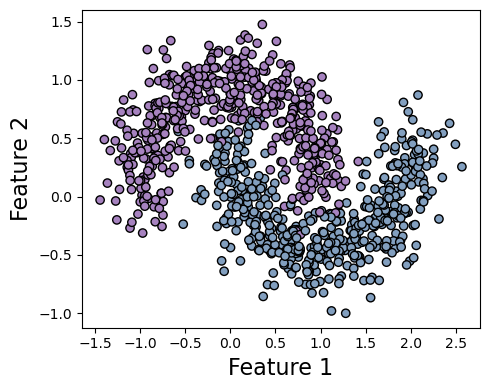

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Création de la figure
fig = plt.figure(figsize=(5, 4))

# Création d'une palette de couleurs personnalisée
custom_cmap = LinearSegmentedColormap.from_list("Color1_Color2", ["#a682bf", "#829fbf"])

# Tracé des points 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolors="black")

# Ajout des labels
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Feature 2", fontsize=16)

# Ajustement et sauvegarde de la figure
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.18/Chap4_Figure_4.18")

# Affichage de la figure
plt.show()

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.18 : Définition des MLP (sans régularisation Vs avec régularisation)</h3>

In [10]:
# Définition des MLP (sans régularisation vs avec régularisation)
def build_mlp(with_regularization=False):
    model = Sequential()
    
    # Ajout d'une couche Input en premier
    model.add(Input(shape=(2,)))
    
    if with_regularization:
        reg = l2(0.01)  # Ajout de L2
    else:
        reg = None  # Pas de régularisation
    
    # Première couche cachée (sans spécifier input_shape)
    model.add(Dense(64, activation="relu", kernel_regularizer=reg))
    
    if with_regularization:
        model.add(Dropout(0.5))  # Dropout ajouté uniquement en régularisation
    
    # Deuxième couche cachée
    model.add(Dense(32, activation="relu", kernel_regularizer=reg))
    
    if with_regularization:
        model.add(Dropout(0.5))
    
    # Couche de sortie
    model.add(Dense(1, activation="sigmoid"))  # Classification binaire
    
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.19 : Création et entraînement du modèle</h3>

In [11]:
# Création du modèle sans régularisation
model_overfit     = build_mlp(with_regularization=False)

# Création du modèle avec régularisation L2 et Dropout
model_regularized = build_mlp(with_regularization=True)  

# Entraînement des modèles
history_overfit = model_overfit.fit(X_train, y_train, epochs=500, batch_size=32,
                                   validation_data=(X_test, y_test), verbose=0)

history_regularized = model_regularized.fit(X_train, y_train, epochs=500, batch_size=32,
                                          validation_data=(X_test, y_test), verbose=0)

<h3><span style="font-size: 30px">🎴</span> Figure 4.19 : Évolution de (a) la perte et (b) la précision sur les données d'entraînement pour un modèle avec et sans régularisation </h3>

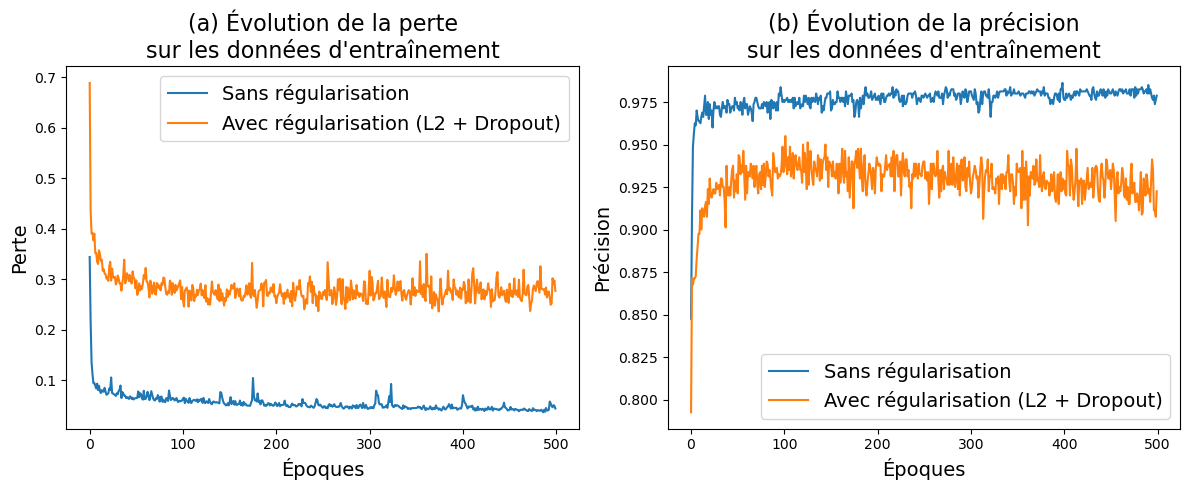

In [12]:
# Courbes d'apprentissage (perte et précision)
fig = plt.figure(figsize=(12, 5))

# 📊 Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_overfit.history["loss"], label="Sans régularisation")
plt.plot(history_regularized.history["loss"], label="Avec régularisation (L2 + Dropout)")
plt.title("(a) Évolution de la perte\nsur les données d'entraînement", fontsize=16)
plt.xlabel("Époques", fontsize=14)
plt.ylabel("Perte", fontsize=14)
plt.legend(fontsize=14)

# 📊 Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_overfit.history["accuracy"], label="Sans régularisation")
plt.plot(history_regularized.history["accuracy"], label="Avec régularisation (L2 + Dropout)")
plt.title("(b) Évolution de la précision\nsur les données d'entraînement", fontsize=16)
plt.xlabel("Époques", fontsize=14)
plt.ylabel("Précision", fontsize=14)
plt.legend(fontsize=14)

# Ajustement et sauvegarde de la figure
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.19/Chap4_Figure_4.19")

# Affichage de la figure
plt.show()

<h3><span style="font-size: 30px">🎴</span> Figure 4.20 : Évolution de (a) la perte et (b) la précision sur les données d'entraînement pour un modèle avec et sans régularisation </h3>

1365/1365 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step


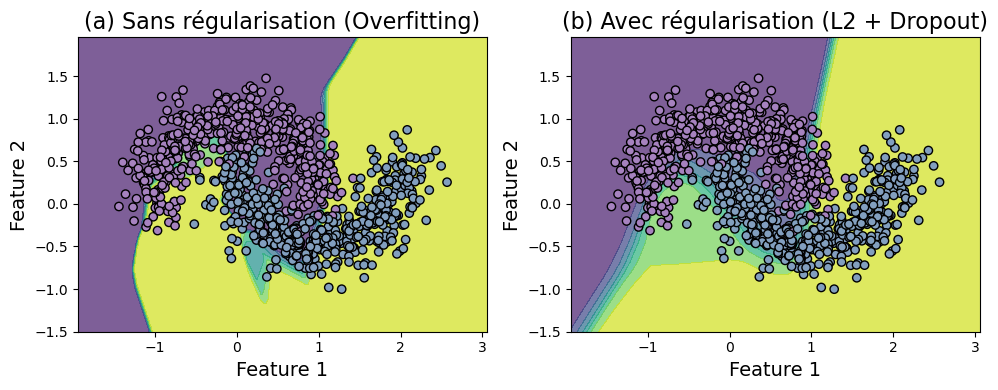

In [13]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Pas de la grille
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolors="black")
    plt.title(title, fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

# Définition de la palette de couleurs personnalisée
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("Color1_Color2", ["#a682bf", "#829fbf"])

# Création de la figure
fig = plt.figure(figsize=(10, 4))

# Première frontière de décision (sans régularisation)
plt.subplot(1, 2, 1)
plot_decision_boundary(model_overfit, X, y, "(a) Sans régularisation (Overfitting)")

# Deuxième frontière de décision (avec régularisation)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_regularized, X, y, "(b) Avec régularisation (L2 + Dropout)")

# Ajustement et sauvegarde de la figure
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.20/Chap4_Figure_4.20")

# Affichage de la figure
plt.show()

<h3><span style="font-size: 30px">🎴</span> Figure 4.21 : Évolution de (a) la perte et (b) la précision sur les données d'entraînement pour un modèle avec et sans régularisation </h3>

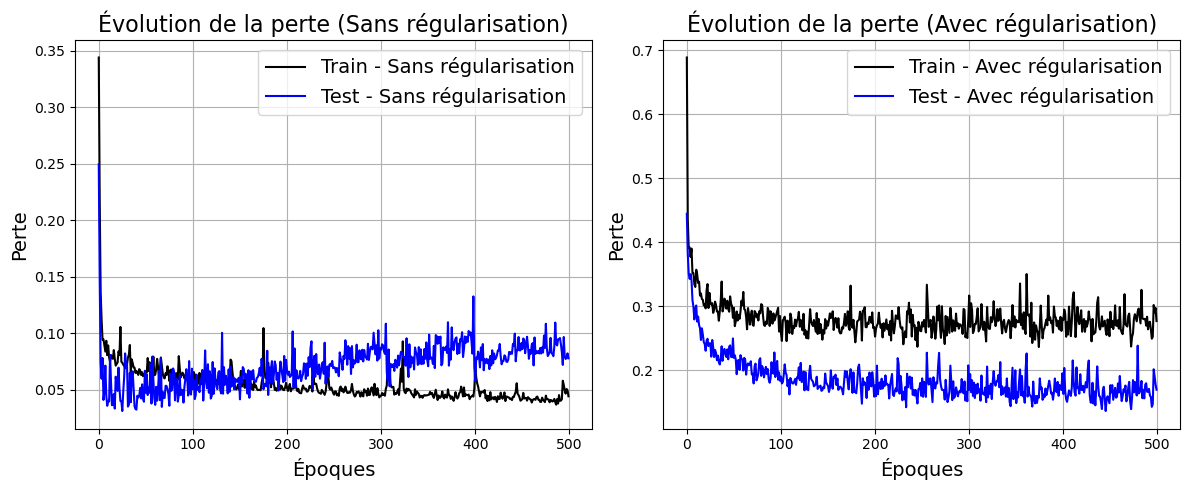

In [14]:
# Création de deux graphiques distincts pour la perte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Courbes de perte (Sans régularisation)
axes[0].plot(history_overfit.history["loss"], label="Train - Sans régularisation", color="black")
axes[0].plot(history_overfit.history["val_loss"], label="Test - Sans régularisation", color="blue")
axes[0].set_title("Évolution de la perte (Sans régularisation)", fontsize=16)
axes[0].set_xlabel("Époques", fontsize=14)
axes[0].set_ylabel("Perte", fontsize=14)
axes[0].legend(fontsize=14)
axes[0].grid()

# Courbes de perte (Avec régularisation)
axes[1].plot(history_regularized.history["loss"], label="Train - Avec régularisation", color="black")
axes[1].plot(history_regularized.history["val_loss"], label="Test - Avec régularisation", color="blue")
axes[1].set_title("Évolution de la perte (Avec régularisation)", fontsize=16)
axes[1].set_xlabel("Époques", fontsize=14)
axes[1].set_ylabel("Perte", fontsize=14)
axes[1].legend(fontsize=14)
axes[1].grid()

# Ajustement et sauvegarde de la figure
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.21/Chap4_Figure_4.21")

# Affichage de la figure
plt.show()